## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.605054  0.785580 -0.174669  1.463133 -0.512867  0.619065
1 -1.034274  0.701315  0.481163  1.909692  1.492147  1.025721
2 -1.065088 -1.137389  1.671076 -0.709374 -0.826345 -0.908160
3 -1.083467  0.315179 -1.244317 -1.396348  0.130246 -0.905207
4  0.455751  0.615012 -1.522713 -0.766995  1.330534  1.454914


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0230765	total: 68.3ms	remaining: 1m 8s
1:	learn: 1.0147122	total: 68.9ms	remaining: 34.4s
2:	learn: 1.0056553	total: 69.5ms	remaining: 23.1s
3:	learn: 0.9948145	total: 70.1ms	remaining: 17.5s
4:	learn: 0.9852763	total: 70.7ms	remaining: 14.1s
5:	learn: 0.9750994	total: 71.3ms	remaining: 11.8s
6:	learn: 0.9647823	total: 71.8ms	remaining: 10.2s
7:	learn: 0.9579909	total: 72.3ms	remaining: 8.97s
8:	learn: 0.9493105	total: 72.9ms	remaining: 8.03s
9:	learn: 0.9404372	total: 73.4ms	remaining: 7.27s
10:	learn: 0.9316779	total: 73.9ms	remaining: 6.64s
11:	learn: 0.9222999	total: 74.4ms	remaining: 6.13s
12:	learn: 0.9124126	total: 74.9ms	remaining: 5.69s
13:	learn: 0.9046450	total: 75.5ms	remaining: 5.32s
14:	learn: 0.8965284	total: 76ms	remaining: 4.99s
15:	learn: 0.8885196	total: 76.5ms	remaining: 4.71s
16:	learn: 0.8799103	total: 77ms	remaining: 4.46s
17:	learn: 0.8724499	total: 77.6ms	remaining: 4.23s
18:	learn: 0.8654111	total: 78.1ms	remaining: 4.

88:	learn: 0.4756510	total: 109ms	remaining: 1.12s
89:	learn: 0.4721099	total: 110ms	remaining: 1.11s
90:	learn: 0.4689917	total: 110ms	remaining: 1.1s
91:	learn: 0.4653431	total: 110ms	remaining: 1.09s
92:	learn: 0.4618640	total: 111ms	remaining: 1.08s
93:	learn: 0.4577428	total: 111ms	remaining: 1.07s
94:	learn: 0.4542800	total: 112ms	remaining: 1.06s
95:	learn: 0.4512383	total: 112ms	remaining: 1.05s
96:	learn: 0.4477524	total: 112ms	remaining: 1.04s
97:	learn: 0.4441337	total: 113ms	remaining: 1.04s
98:	learn: 0.4406283	total: 113ms	remaining: 1.03s
99:	learn: 0.4373464	total: 113ms	remaining: 1.02s
100:	learn: 0.4342879	total: 114ms	remaining: 1.01s
101:	learn: 0.4318801	total: 114ms	remaining: 1s
102:	learn: 0.4282635	total: 115ms	remaining: 999ms
103:	learn: 0.4249405	total: 115ms	remaining: 991ms
104:	learn: 0.4219980	total: 116ms	remaining: 986ms
105:	learn: 0.4189713	total: 116ms	remaining: 979ms
106:	learn: 0.4161415	total: 117ms	remaining: 973ms
107:	learn: 0.4126743	total:

250:	learn: 0.1513379	total: 188ms	remaining: 560ms
251:	learn: 0.1501118	total: 188ms	remaining: 559ms
252:	learn: 0.1490204	total: 189ms	remaining: 558ms
253:	learn: 0.1478368	total: 189ms	remaining: 556ms
254:	learn: 0.1469484	total: 190ms	remaining: 554ms
255:	learn: 0.1458942	total: 190ms	remaining: 553ms
256:	learn: 0.1448069	total: 191ms	remaining: 551ms
257:	learn: 0.1436850	total: 191ms	remaining: 549ms
258:	learn: 0.1425877	total: 191ms	remaining: 548ms
259:	learn: 0.1418169	total: 192ms	remaining: 547ms
260:	learn: 0.1409752	total: 193ms	remaining: 545ms
261:	learn: 0.1400077	total: 193ms	remaining: 544ms
262:	learn: 0.1390646	total: 193ms	remaining: 542ms
263:	learn: 0.1381620	total: 194ms	remaining: 540ms
264:	learn: 0.1371358	total: 194ms	remaining: 539ms
265:	learn: 0.1362015	total: 195ms	remaining: 538ms
266:	learn: 0.1352930	total: 195ms	remaining: 536ms
267:	learn: 0.1343957	total: 196ms	remaining: 535ms
268:	learn: 0.1333371	total: 196ms	remaining: 533ms
269:	learn: 

479:	learn: 0.0479828	total: 293ms	remaining: 317ms
480:	learn: 0.0477816	total: 294ms	remaining: 317ms
481:	learn: 0.0476563	total: 294ms	remaining: 316ms
482:	learn: 0.0474839	total: 294ms	remaining: 315ms
483:	learn: 0.0472573	total: 295ms	remaining: 314ms
484:	learn: 0.0470317	total: 295ms	remaining: 313ms
485:	learn: 0.0468166	total: 296ms	remaining: 313ms
486:	learn: 0.0466399	total: 296ms	remaining: 312ms
487:	learn: 0.0465323	total: 296ms	remaining: 311ms
488:	learn: 0.0463621	total: 297ms	remaining: 310ms
489:	learn: 0.0460765	total: 297ms	remaining: 309ms
490:	learn: 0.0459090	total: 297ms	remaining: 308ms
491:	learn: 0.0455738	total: 298ms	remaining: 308ms
492:	learn: 0.0453190	total: 298ms	remaining: 307ms
493:	learn: 0.0449882	total: 299ms	remaining: 306ms
494:	learn: 0.0446649	total: 299ms	remaining: 305ms
495:	learn: 0.0443488	total: 300ms	remaining: 305ms
496:	learn: 0.0442769	total: 300ms	remaining: 304ms
497:	learn: 0.0439685	total: 300ms	remaining: 303ms
498:	learn: 

649:	learn: 0.0224463	total: 371ms	remaining: 200ms
650:	learn: 0.0223665	total: 371ms	remaining: 199ms
651:	learn: 0.0222089	total: 372ms	remaining: 198ms
652:	learn: 0.0221307	total: 373ms	remaining: 198ms
653:	learn: 0.0220538	total: 374ms	remaining: 198ms
654:	learn: 0.0219070	total: 374ms	remaining: 197ms
655:	learn: 0.0218178	total: 375ms	remaining: 196ms
656:	learn: 0.0217084	total: 375ms	remaining: 196ms
657:	learn: 0.0216339	total: 375ms	remaining: 195ms
658:	learn: 0.0214737	total: 376ms	remaining: 194ms
659:	learn: 0.0213766	total: 376ms	remaining: 194ms
660:	learn: 0.0212817	total: 377ms	remaining: 193ms
661:	learn: 0.0211890	total: 377ms	remaining: 192ms
662:	learn: 0.0211239	total: 378ms	remaining: 192ms
663:	learn: 0.0210677	total: 378ms	remaining: 191ms
664:	learn: 0.0210128	total: 379ms	remaining: 191ms
665:	learn: 0.0208756	total: 379ms	remaining: 190ms
666:	learn: 0.0207321	total: 380ms	remaining: 189ms
667:	learn: 0.0206503	total: 380ms	remaining: 189ms
668:	learn: 

873:	learn: 0.0089448	total: 477ms	remaining: 68.7ms
874:	learn: 0.0088937	total: 477ms	remaining: 68.2ms
875:	learn: 0.0088685	total: 478ms	remaining: 67.6ms
876:	learn: 0.0088439	total: 478ms	remaining: 67.1ms
877:	learn: 0.0088217	total: 478ms	remaining: 66.5ms
878:	learn: 0.0087844	total: 479ms	remaining: 65.9ms
879:	learn: 0.0087539	total: 479ms	remaining: 65.3ms
880:	learn: 0.0087256	total: 480ms	remaining: 64.8ms
881:	learn: 0.0086979	total: 480ms	remaining: 64.2ms
882:	learn: 0.0086622	total: 480ms	remaining: 63.7ms
883:	learn: 0.0086155	total: 481ms	remaining: 63.1ms
884:	learn: 0.0085978	total: 481ms	remaining: 62.5ms
885:	learn: 0.0085520	total: 482ms	remaining: 62ms
886:	learn: 0.0085173	total: 482ms	remaining: 61.4ms
887:	learn: 0.0084724	total: 482ms	remaining: 60.9ms
888:	learn: 0.0084311	total: 483ms	remaining: 60.3ms
889:	learn: 0.0083906	total: 483ms	remaining: 59.7ms
890:	learn: 0.0083525	total: 484ms	remaining: 59.2ms
891:	learn: 0.0083060	total: 484ms	remaining: 58

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

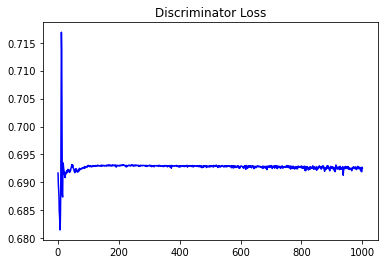

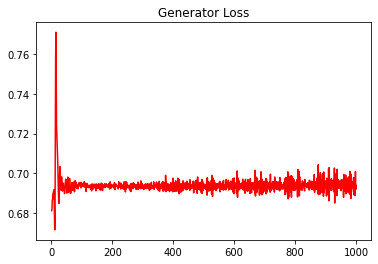

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07673325537063974


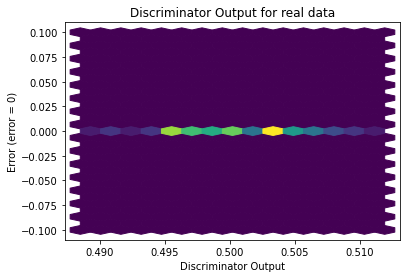

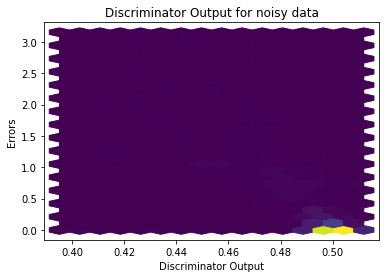

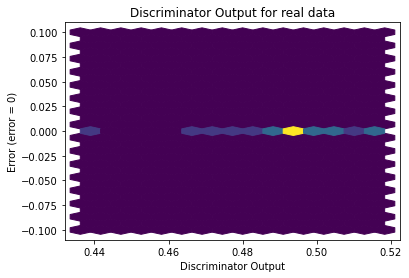

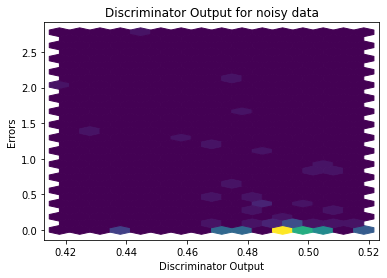

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


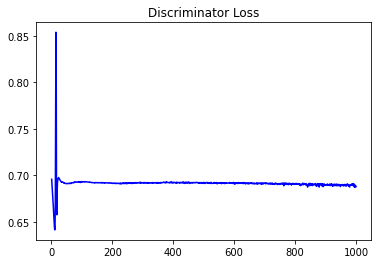

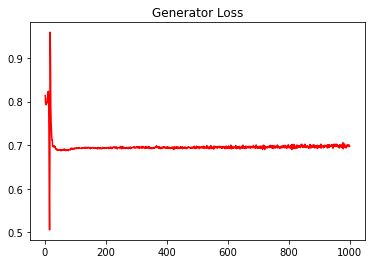

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.06904444162299221


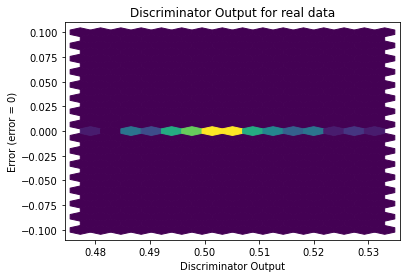

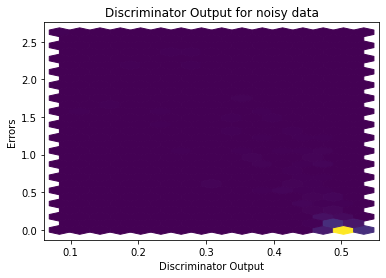

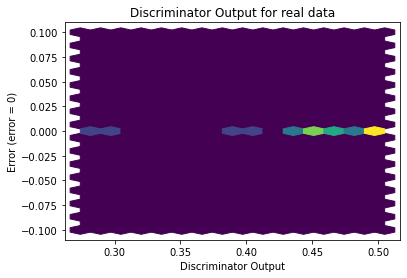

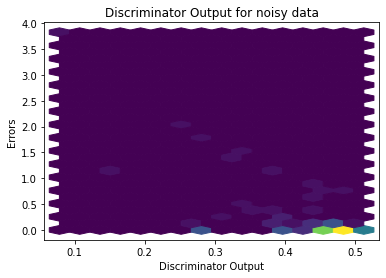

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0805]], requires_grad=True)
